<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 11

In [2]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [3]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names

Print off the first document and its target classification to make sure its been downloaded correctly 

In [4]:
print(docs[0])
print(names[targets[0]])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





rec.autos


## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. Specifically, plot a bar chart showing distribution of the categories (classes)

In [5]:
target_names = [names[targets[i]] for i in range(len(targets))]

<BarContainer object of 20 artists>

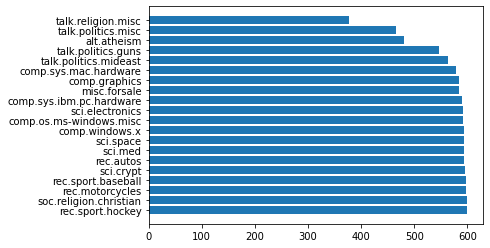

In [6]:
from collections import Counter
labels, heights = zip(*Counter(target_names).most_common())
plt.barh(labels, heights, align="center")

## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words="english")
X_tfidf = vectorizer.fit_transform(docs)

In [8]:
print(X_tfidf.shape[0])

11314


In [9]:
print(X_tfidf.shape[1]) #num of features (words)

25631


In [10]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zy', 'zyeh', 'zz'], dtype=object)

In [11]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Exercise 4: Split the Data

Split your data into train and test splits. Use an 80%/20% split rule for train and test respectively. I'd recommend using the function from the last lab

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, target_names, test_size=0.2)

## Exercise 5: Train the Model

Using sklearn, train the following three classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression

In [13]:
# Train the model using the KNN Cluster Algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Train the model using the Decision Tree Algorithm

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [17]:
# Train the model using the Logistic Regression Algorithm

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

In [18]:
# Evaluate the KNN Cluster model

In [32]:
knn.score(X_test, y_test)

0.764471939902784

In [20]:
# Evaluate the Decision Tree model

In [33]:
clf.score(X_test, y_test)

0.6522315510384445

In [21]:
# Evaluate the Logistic Regression model

In [34]:
logreg.score(X_test, y_test)

0.8864339372514362

Discuss which one performs the best:

The logistic regression model preforms the best, while the decision tree model preforms the worst. I did notice that it took longer to train the logistic regression model (10 seconds) compared to the decision tree model (7 seconds), though the knn model trained in just a second or two. It makes me wonder how programmers evaluate time vs. accuracy, because just a couple seconds in these baby data could translate to a couple weeks or months in bigger data. People might value the faster KNN model more than the more accurate logreg model.